In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
%run -i 'functions.py'


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
ERROR:root:File `'functions.py'` not found.


In [3]:
pd.set_option('display.max_columns', None)
wine= pd.read_csv('winequalityN.csv')

In [4]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

After some research of each variable, I can to a conclusion it is best to drop the rows with null values because if I relplace with 0,it will affect the meaning.

In [10]:
wine.dropna(inplace=True)

In [12]:
wine.shape

(6463, 13)

In [13]:
wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
wine.mean()

fixed acidity             7.217755
volatile acidity          0.339589
citric acid               0.318758
residual sugar            5.443958
chlorides                 0.056056
free sulfur dioxide      30.516865
total sulfur dioxide    115.694492
density                   0.994698
pH                        3.218332
sulphates                 0.531150
alcohol                  10.492825
quality                   5.818505
dtype: float64

I am seperating the big dataframe into the two diferent type of wines mainly for EDA

In [23]:
red = wine[wine['type'] == 'red']
white = wine[wine['type'] == 'white']

In [21]:
red.shape

(1593, 13)

There is about a third of white wines compared to the red ones. 

In [22]:
white.shape

(4870, 13)

## EDA

### Alcohol

10.516772073917489


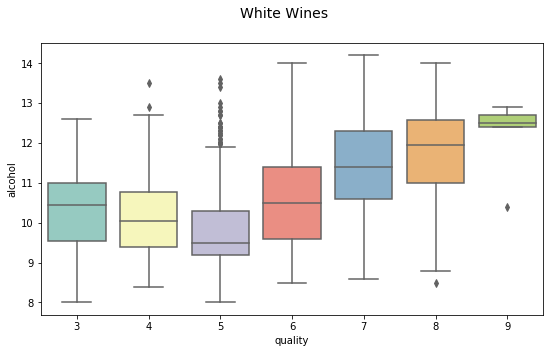

In [47]:
f= plt.figure(figsize=(9,5))
f.suptitle('White Wines', fontsize= 14)
sns.boxplot(x= 'quality' , y= 'alcohol' , data=white, palette ='Set3')
print(white['alcohol'].mean())


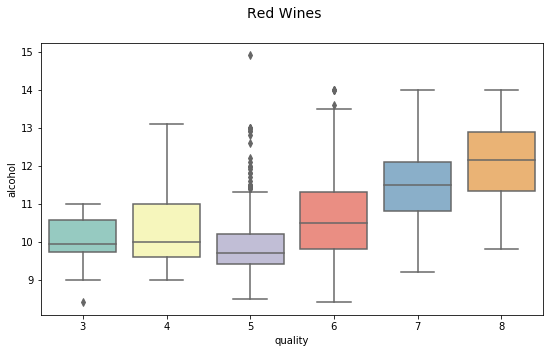

In [40]:
f= plt.figure(figsize=(9,5))
f.suptitle('Red Wines', fontsize= 14)
sns.boxplot(x= 'quality' , y= 'alcohol' , data=red, palette ='Set3')

From the visuals we can observe the maximum quality of red wines is 8, in comparison to the the white wines which maximum is 9. The quality of the wines are rated by professionals. 

### Acidity 

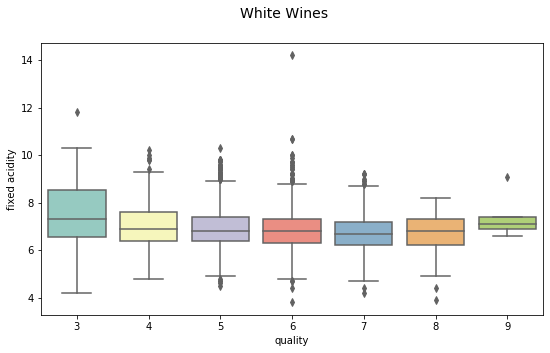

In [44]:
f= plt.figure(figsize=(9,5))
f.suptitle('White Wines', fontsize= 14)
sns.boxplot(x= 'quality' , y= 'fixed acidity' , data=white, palette ='Set3')

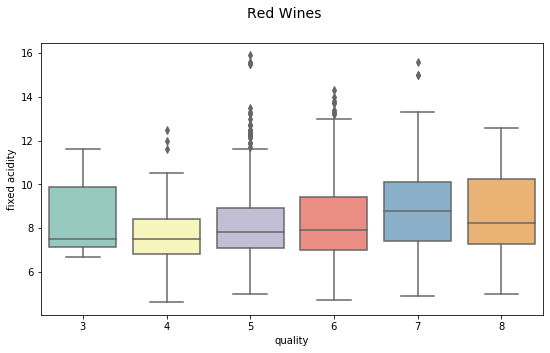

In [45]:
f= plt.figure(figsize=(9,5))
f.suptitle('Red Wines', fontsize= 14)
sns.boxplot(x= 'quality' , y= 'fixed acidity' , data=red, palette ='Set3')